In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read in data
df = pd.read_csv("/content/product_review.csv")
print(df.shape)
df = df.head(500)
print(df.shape)

(1700, 5)
(500, 5)


In [3]:
df.head()

,product,title,date,rating,body
0,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Great battery life, great performance!","Reviewed in the United States on December 6, 2022",5.0,UPDATE 3/8/2023: i bought parallels desktop an...
1,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Very lightweight, good speed, but NOT gold at all","Reviewed in the United States on December 6, 2022",4.0,Updated review with more detail [after 2 weeks...
2,Amazon.com: Customer reviews: Apple 2020 MacBo...,Great notebook with almost no weaknesses,"Reviewed in the United States on December 6, 2022",5.0,Why is it that the PC world cannot make a good...
3,Amazon.com: Customer reviews: Apple 2020 MacBo...,The best device for work and travel,"Reviewed in the United States on December 6, 2022",5.0,"As a programmer, I can say that this is just t..."
4,Amazon.com: Customer reviews: Apple 2020 MacBo...,Finally able to move to a mac,"Reviewed in the United States on December 6, 2022",5.0,I have tried for years to move to a mac given ...


In [4]:
df = df.drop('title', axis=1)

In [5]:
df = df.reset_index()
df['index'] = df['index'] + 1
df.head()

,index,product,date,rating,body
0,1,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,UPDATE 3/8/2023: i bought parallels desktop an...
1,2,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",4.0,Updated review with more detail [after 2 weeks...
2,3,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,Why is it that the PC world cannot make a good...
3,4,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,"As a programmer, I can say that this is just t..."
4,5,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,I have tried for years to move to a mac given ...


In [6]:
df.rename(columns={'index': 'review_number'}, inplace=True)

In [7]:
df.dtypes

review_number      int64
product           object
date              object
rating           float64
body              object
dtype: object

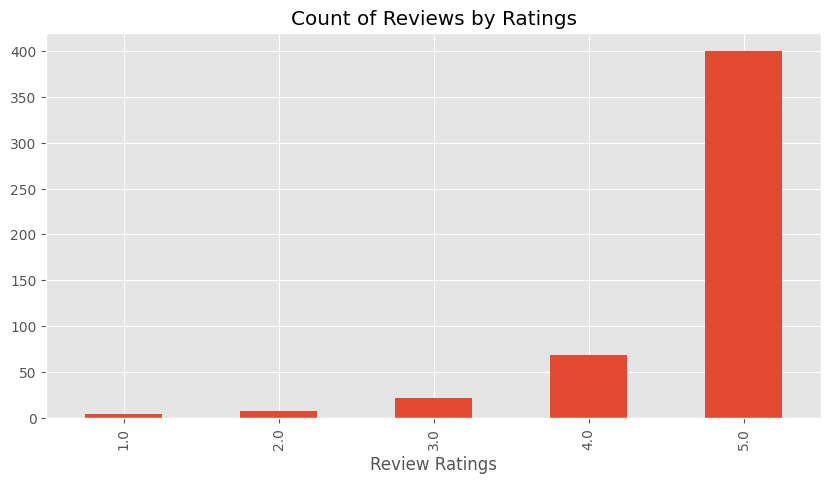

In [8]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Ratings',
          figsize=(10, 5))
ax.set_xlabel('Review Ratings')
plt.show()

In [9]:
example = df['body'][50]
print(example)

i am a windows man way back 40 yrs.  since i used windows software for work i saw no reason to switch to apple.  although i did have an apple  IIc for fun way back in the early pc daysMy surface pro entry model has been around for many yrs and the battery has run down and mostly i use it plugged in. I decided to try a mac to learn something new. After research i decided to get the mac air m1 w 8GB ram and the 512GB SSD - this is what i learned ( not going into why i decided what i did as anyone can do the same research1. setup and initial use was not as easy as advertised- couldnt get past the country selection and found after search many had same problem. almost returned it but i finally found i could move selection by tab key AND selection based on space press and  NOT return key - track pad was useless - ( it had a little to do with track pad setup that can only be performed later as well as track pad difference from MS product) .windows and track pad usage not same as windows and i

In [10]:
example1 = df['body'][10]
print(example1)

Perfect for my daughter who is a student.


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['i', 'am', 'a', 'windows', 'man', 'way', 'back', '40', 'yrs', '.']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('i', 'NN'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('windows', 'JJ'),
 ('man', 'NN'),
 ('way', 'NN'),
 ('back', 'RB'),
 ('40', 'CD'),
 ('yrs', 'NN'),
 ('.', '.')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  i/NN
  am/VBP
  a/DT
  windows/JJ
  man/NN
  way/NN
  back/RB
  40/CD
  yrs/NN
  ./.
  since/IN
  i/NN
  used/VBN
  windows/NNS
  software/NN
  for/IN
  work/NN
  i/NN
  saw/VBD
  no/DT
  reason/NN
  to/TO
  switch/VB
  to/TO
  apple/NN
  ./.
  although/IN
  i/NN
  did/VBD
  have/VB
  an/DT
  apple/NN
  (ORGANIZATION IIc/NNP)
  for/IN
  fun/NN
  way/NN
  back/RB
  in/IN
  the/DT
  early/JJ
  pc/NN
  (ORGANIZATION daysMy/NN)
  surface/NN
  pro/JJ
  entry/NN
  model/NN
  has/VBZ
  been/VBN
  around/IN
  for/IN
  many/JJ
  yrs/NNS
  and/CC
  the/DT
  battery/NN
  has/VBZ
  run/VBN
  down/RB
  and/CC
  mostly/RB
  i/JJ
  use/VBP
  it/PRP
  plugged/VBD
  in/IN
  ./.
  I/PRP
  decided/VBD
  to/TO
  try/VB
  a/DT
  mac/NN
  to/TO
  learn/VB
  something/NN
  new/JJ
  ./.
  After/IN
  research/NN
  i/NN
  decided/VBD
  to/TO
  get/VB
  the/DT
  mac/NNP
  air/NN
  m1/VBD
  w/$
  8GB/CD
  ram/NN
  and/CC
  the/DT
  512GB/CD
  (ORGANIZATION SSD/NNP)
  -/:
  this/DT
  is/VBZ
  what/WP
  i/NN
 

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
sia.polarity_scores(example)

{'neg': 0.04, 'neu': 0.872, 'pos': 0.087, 'compound': 0.977}

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['body'])
    myid = row['review_number']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.065,0.842,0.093,0.9882
2,0.059,0.848,0.093,0.9882
3,0.035,0.814,0.152,0.9430
4,0.065,0.806,0.129,0.8678
5,0.000,0.932,0.068,0.7895
...,...,...,...,...
496,0.078,0.777,0.145,0.4404
497,0.000,0.424,0.576,0.9273
498,0.000,0.819,0.181,0.4767
499,0.000,0.702,0.298,0.9274


In [20]:
vaders = vaders.reset_index()
vaders.head()

,index,neg,neu,pos,compound
0,1,0.065,0.842,0.093,0.9882
1,2,0.059,0.848,0.093,0.9882
2,3,0.035,0.814,0.152,0.9430
3,4,0.065,0.806,0.129,0.8678
4,5,0.000,0.932,0.068,0.7895


In [21]:
vaders.rename(columns={'index': 'review_number'}, inplace=True)
vaders

,review_number,neg,neu,pos,compound
0,1,0.065,0.842,0.093,0.9882
1,2,0.059,0.848,0.093,0.9882
2,3,0.035,0.814,0.152,0.9430
3,4,0.065,0.806,0.129,0.8678
4,5,0.000,0.932,0.068,0.7895
...,...,...,...,...,...
495,496,0.078,0.777,0.145,0.4404
496,497,0.000,0.424,0.576,0.9273
497,498,0.000,0.819,0.181,0.4767
498,499,0.000,0.702,0.298,0.9274


In [22]:
vaders

,review_number,neg,neu,pos,compound
0,1,0.065,0.842,0.093,0.9882
1,2,0.059,0.848,0.093,0.9882
2,3,0.035,0.814,0.152,0.9430
3,4,0.065,0.806,0.129,0.8678
4,5,0.000,0.932,0.068,0.7895
...,...,...,...,...,...
495,496,0.078,0.777,0.145,0.4404
496,497,0.000,0.424,0.576,0.9273
497,498,0.000,0.819,0.181,0.4767
498,499,0.000,0.702,0.298,0.9274


In [23]:
vaders.rename(columns={'index': 'review_number'}, inplace=True)

In [24]:
#Mergring the rating dataframe and sentiment score dataframe
vaders = vaders.merge(df, how='left')

In [25]:
vaders.head()

,review_number,neg,neu,pos,compound,product,date,rating,body
0,1,0.065,0.842,0.093,0.9882,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,UPDATE 3/8/2023: i bought parallels desktop an...
1,2,0.059,0.848,0.093,0.9882,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",4.0,Updated review with more detail [after 2 weeks...
2,3,0.035,0.814,0.152,0.9430,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,Why is it that the PC world cannot make a good...
3,4,0.065,0.806,0.129,0.8678,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,"As a programmer, I can say that this is just t..."
4,5,0.000,0.932,0.068,0.7895,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Reviewed in the United States on December 6, 2022",5.0,I have tried for years to move to a mac given ...


In [26]:
#For comparison with sentiment score
vaders['Rating_percentage'] = vaders['rating'] / 5

In [27]:
#Rounding to the nearest 0.20 decimal
def custom_round(number, options=[0.20, 0.40, 0.60, 0.80, 1.00]):
    return min(options, key=lambda x: abs(x - number))


# Applying the custom rounding function to the entire column
vaders['rounded_compound'] = vaders['compound'].apply(custom_round)

In [28]:
#Random sample of 20
new_vaders = vaders[['review_number', 'rounded_compound', 'Rating_percentage']].sample(n=20, random_state=2)

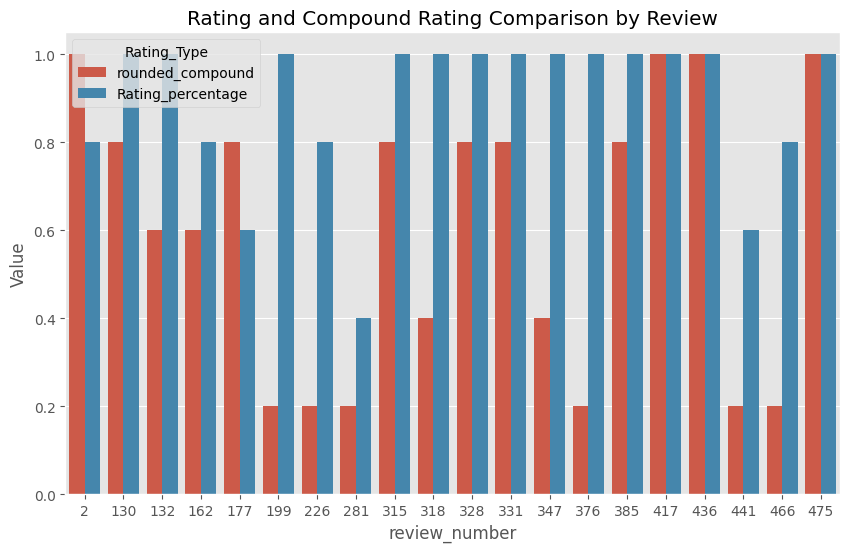

In [29]:
# Reshaping the DataFrame
vaders_melt = new_vaders.melt(id_vars='review_number', var_name='Rating_Type', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='review_number', y='Value', hue='Rating_Type', data=vaders_melt)
plt.title('Rating and Compound Rating Comparison by Review')
plt.show()

In [30]:
#For analysis
check = vaders.iloc[416:417][['review_number', 'rating', 'body',]]
check

,review_number,rating,body
416,417,5.0,"APPLE makes the best computers! Reliable, the..."


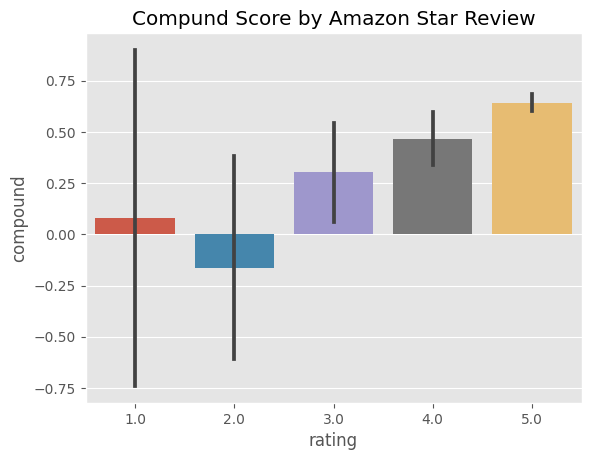

In [31]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [32]:
#EVALUATION: Accuracy
def categorize_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def categorize_rating(rating_score):
    if rating_score > 3:
        return 'Positive'
    elif rating_score < 3:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
vaders['sentiment_category'] = vaders['compound'].apply(categorize_sentiment)
vaders['rating_category'] = vaders['rating'].apply(categorize_rating)
#sentiment_category = categorize_sentiment(vaders['compound'])
#rating_category = categorize_sentiment(vaders['rating'])

In [33]:
from sklearn.metrics import confusion_matrix
y_true = vaders['rating_category']
y_pred = vaders['sentiment_category']
conf_matrix = confusion_matrix(y_true, y_pred)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.804
